# Project Data Visualization VGSales

## Preparation

### Importing packages 

In [1]:
!pip install ipywidgets
!pip install wheels
!pip install pandas
!pip install dash
!pip install jupyter-dash
!pip install seaborn
!pip install dash_table_experiments
!pip install jupyter_server_proxy
!pip install jupyterlab_dash

ERROR: Could not find a version that satisfies the requirement wheels (from versions: none)
ERROR: No matching distribution found for wheels


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table_experiments as dt
import dash.dependencies
from dash.dependencies import Input, Output, State
import plotly
from plotly.tools import mpl_to_plotly

In [3]:
from jupyter_dash.comms import _send_jupyter_config_comm_request
_send_jupyter_config_comm_request()

In [4]:
from jupyter_dash import JupyterDash
import plotly.express as px
import jupyterlab_dash
import jupyter_server_proxy

### Importing data into dataframe

In [5]:
df = pd.read_csv('Video_Games_Sales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


### Dropping some data

In [7]:
df = df.drop(df[df['Global_Sales'] == 82.74].index) # drop WiiSports, game sold with WII
df = df.drop(df[df['Name'] == 'Strongest Tokyo University Shogi DS'].index) # drop anomaly, DS game in 1985
df = df[df['Name'].notna()]
df = df[df['Genre'].notna()]
df = df[df['Platform'].notna()]
df = df[df['Publisher'].notna()]
df = df[df['Year_of_Release'].notna()]
df = df.drop(df[df['Year_of_Release'] == 2017].index) 
df = df.drop(df[df['Year_of_Release'] == 2020].index) 

In [8]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16411.000000,16411.000000,16411.000000,16411.000000,16411.000000,16411.000000,7982.000000,7982.000000,7461.000000,7461.000000
mean,2006.488453,0.264193,0.146078,0.078642,0.047683,0.536849,68.997119,26.440992,7.126900,163.008846
std,5.876987,0.819142,0.507205,0.311394,0.188184,1.560100,13.918755,19.009305,1.498886,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


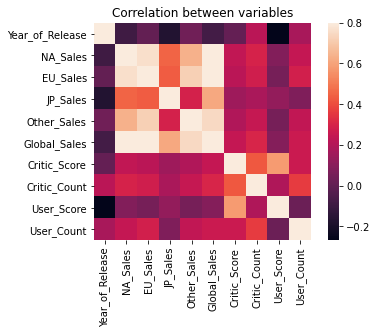

In [30]:
corrmat = df.corr()
fig5 = sns.heatmap(corrmat, vmax=.8, square=True).set_title('Correlation between variables')

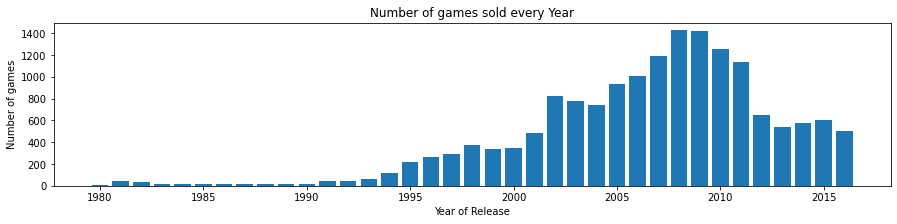

In [31]:
x = df['Year_of_Release'].value_counts().keys()
y = df['Year_of_Release'].value_counts()
plt.figure(figsize=(15,3))
fig6 = plt.bar(x,y)
plt.ylabel("Number of games")
plt.xlabel("Year of Release")
plt.title("Number of games sold every Year")


plt.show()

Text(0, 0.5, 'Genre')

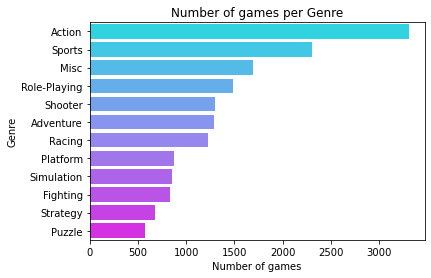

In [33]:
fig3 = sns.barplot(x = df['Genre'].value_counts(), y = df['Genre'].value_counts().keys(), 
                   palette="cool").set_title("Number of games per Genre")
plt.xlabel("Number of games")
plt.ylabel("Genre")

In [60]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
server = app.server
app.layout = html.Div([
        html.Div([
            dcc.Graph(id='fig1')
        ]),

        html.Div([
            dcc.Slider(id='the_year',
                min=df['Year_of_Release'].min(),
                max=df['Year_of_Release'].max(),
                value=df['Year_of_Release'].min(),
                marks={str(year): str(year) for year in df['Year_of_Release'].unique()},
                step=None)
        ],style={"width": "90%", "position":"absolute",
                 "left":"5%"})
])

@app.callback(
    Output('fig1','figure'),
    [Input('the_year','value')]
)

def update_graph(year_chosen):

    dff=df[(df['Year_of_Release']==year_chosen)]

    barplot = px.bar(
        data_frame=dff,
        x='Name',
        y='Global_Sales',
        hover_data=['Platform'],
        #text="Platform",
        title = "Yearly Global Video Game Sales",
        labels={'Name':'Games in' + str(year_chosen), 'Global_Sales':'Global Sales (in million)'},
        height=1000
    )

    return (barplot)

app.run_server(debug="True", mode="inline")

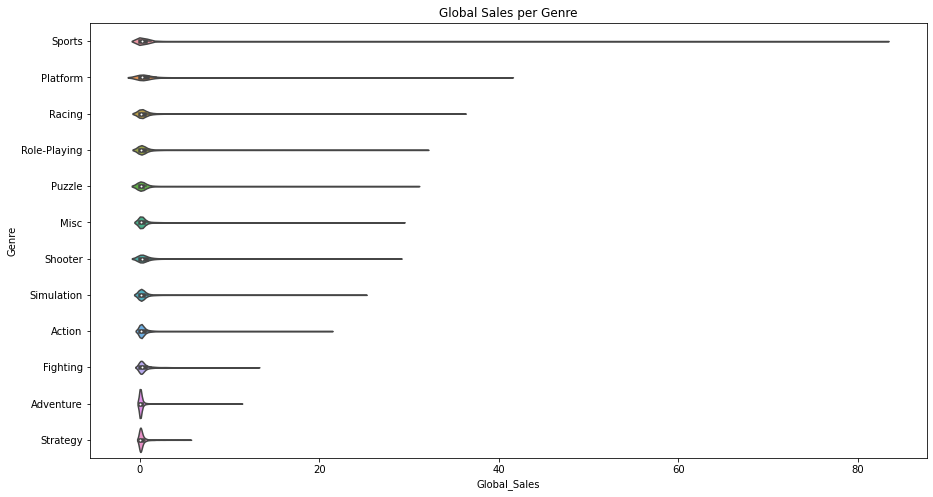

In [36]:
fig1, ax = plt.subplots(figsize=(15,8))
fig1 = sns.violinplot(x="Global_Sales", y="Genre", data = df, ax=ax).set_title("Global Sales per Genre")

In [38]:
data = [df['Year_of_Release'].groupby(df['Year_of_Release']).mean(),
df['EU_Sales'].groupby(df['Year_of_Release']).sum(), 
df['NA_Sales'].groupby(df['Year_of_Release']).sum(),
df['JP_Sales'].groupby(df['Year_of_Release']).sum(),
df['Other_Sales'].groupby(df['Year_of_Release']).sum()
]

headers = ["Year_of_Release","EU_Sales", "NA_Sales", "JP_Sales", "Other_Sales"]

dfpie = pd.concat(data, axis=1, keys=headers)
dfpie

,Year_of_Release,EU_Sales,NA_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,,
1980.0,1980.0,0.67,10.59,0.00,0.12
1981.0,1981.0,1.96,33.40,0.00,0.32
1982.0,1982.0,1.65,26.92,0.00,0.31
1983.0,1983.0,0.80,7.76,8.10,0.14
1984.0,1984.0,2.10,33.28,14.27,0.70
1985.0,1985.0,4.74,33.73,14.54,0.92
1986.0,1986.0,2.84,12.50,19.81,1.93
1987.0,1987.0,1.41,8.46,11.63,0.20
1988.0,1988.0,6.59,23.87,15.76,0.99


In [61]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
server = app.server
app.layout = html.Div([
        html.Div([
            dcc.Graph(id='fig9')
        ]),

        html.Div([
            dcc.Slider(id='the_year',
                min=df['Year_of_Release'].min(),
                max=df['Year_of_Release'].max(),
                value=df['Year_of_Release'].min(),
                marks={str(year): str(year) for year in df['Year_of_Release'].unique()},
                step=None)
        ],style={"width": "90%", "position":"absolute",
                 "left":"5%"})
])

@app.callback(
    Output('fig9','figure'),
    [Input('the_year','value')]
)

def update_graph(year_chosen):
    
    dffpie=dfpie[(dfpie['Year_of_Release']==year_chosen)]
    
    for i, (idx, row) in enumerate(dffpie.set_index('Year_of_Release').iterrows()):
        row = row[row.gt(row.sum() * .01)]

    pieplot = px.pie(
        values = row,
        names = row.index,
        title = "Repartition of Sales in " + str(year_chosen),
        height=550
    )

    return (pieplot)

app.run_server(debug="True", mode="inline")

Text(0.5, 1.0, 'Count of games by Publisher and year')

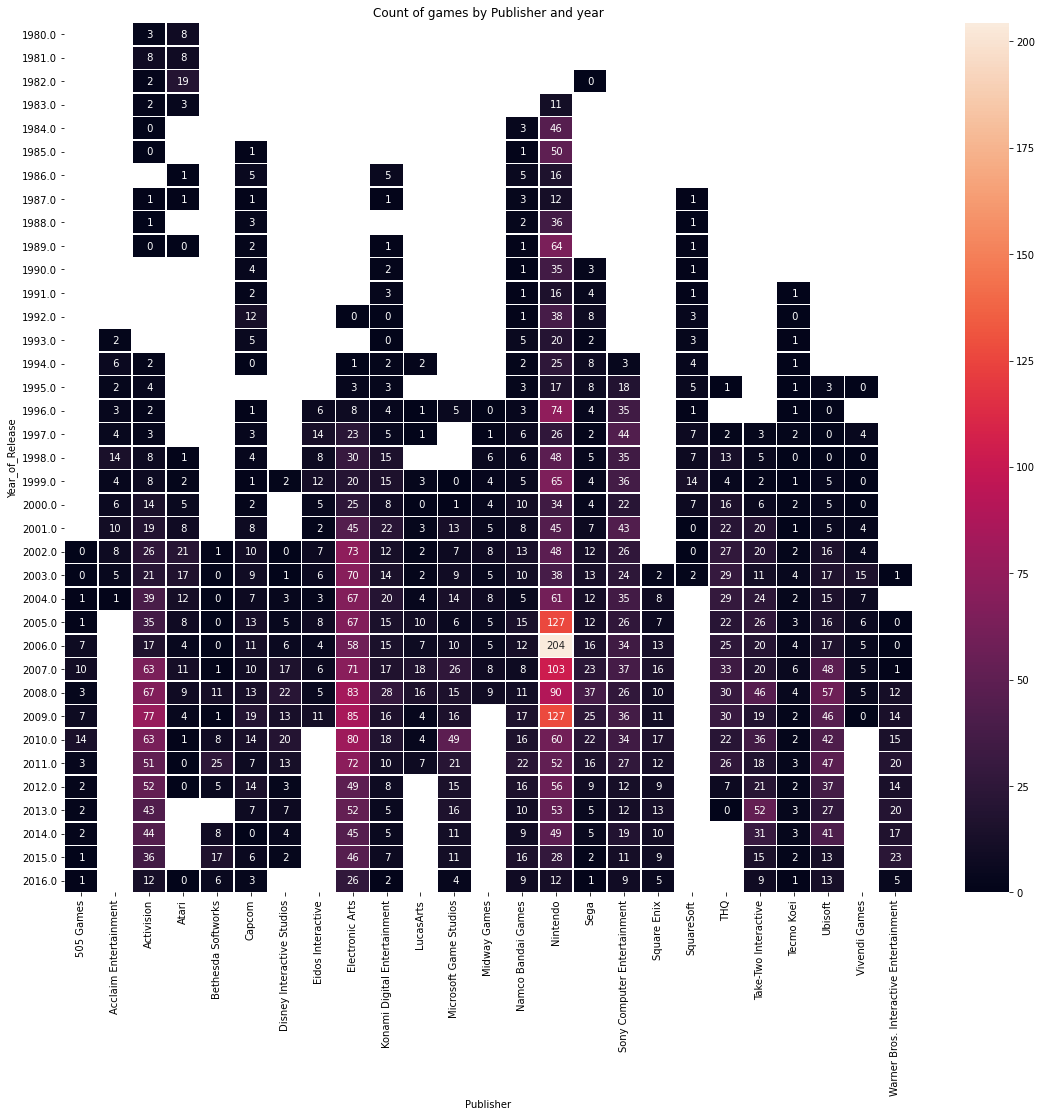

In [16]:
#We find that there are 579 unique publishers. We take only the top 25.
#We notice a probable outlier for Nintendo in 2006.
most_published = df.groupby('Publisher').Global_Sales.sum()
most_published.sort_values(ascending=False)[:25]
table_publishers =  pd.pivot_table(df[df.Publisher.isin(most_published.sort_values(ascending=False)[:25].index)],values=['Global_Sales'],index=['Year_of_Release'],columns=['Publisher'],aggfunc='sum',margins=False)

plt.figure(figsize=(19,16))
sns.heatmap(table_publishers['Global_Sales'],linewidths=.5,annot=True,fmt='2.0f',vmin=0)
plt.title('Count of games by Publisher and year')

In [17]:
df_count_Genre_by_Platform = df.groupby(['Platform', 'Genre']).size()
df_genre_by_platform = df_count_Genre_by_Platform.to_frame(name = 'size').reset_index()
df_genre_by_platform

,Platform,Genre,size
0,2600,Action,55
1,2600,Adventure,1
2,2600,Fighting,1
3,2600,Misc,5
4,2600,Platform,9
...,...,...,...
288,XOne,Role-Playing,14
289,XOne,Shooter,38
290,XOne,Simulation,4
291,XOne,Sports,38


Text(0.5, 1.0, 'Count of games by Genre and Platform')

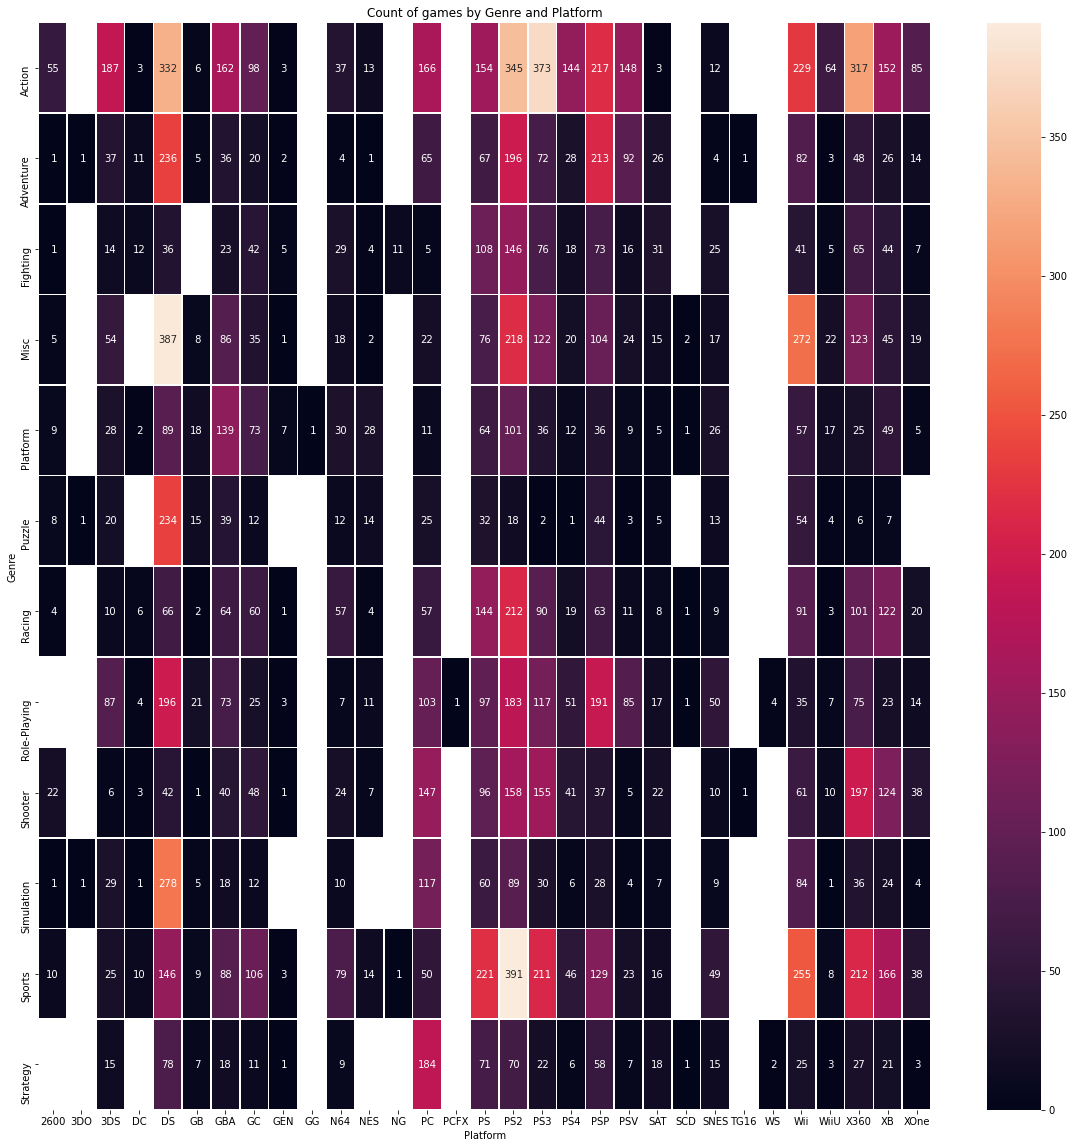

In [42]:
table_platforms = pd.pivot_table(df_genre_by_platform,values=['size'],index=['Genre'],columns=['Platform'],margins=False)

plt.figure(figsize=(20,20))
sns.heatmap(table_platforms['size'],linewidths=.5,annot=True,fmt='2.0f',vmin=0)
plt.title('Count of games by Genre and Platform')

Text(0.5, 1.0, 'Count of yearly games per platform')

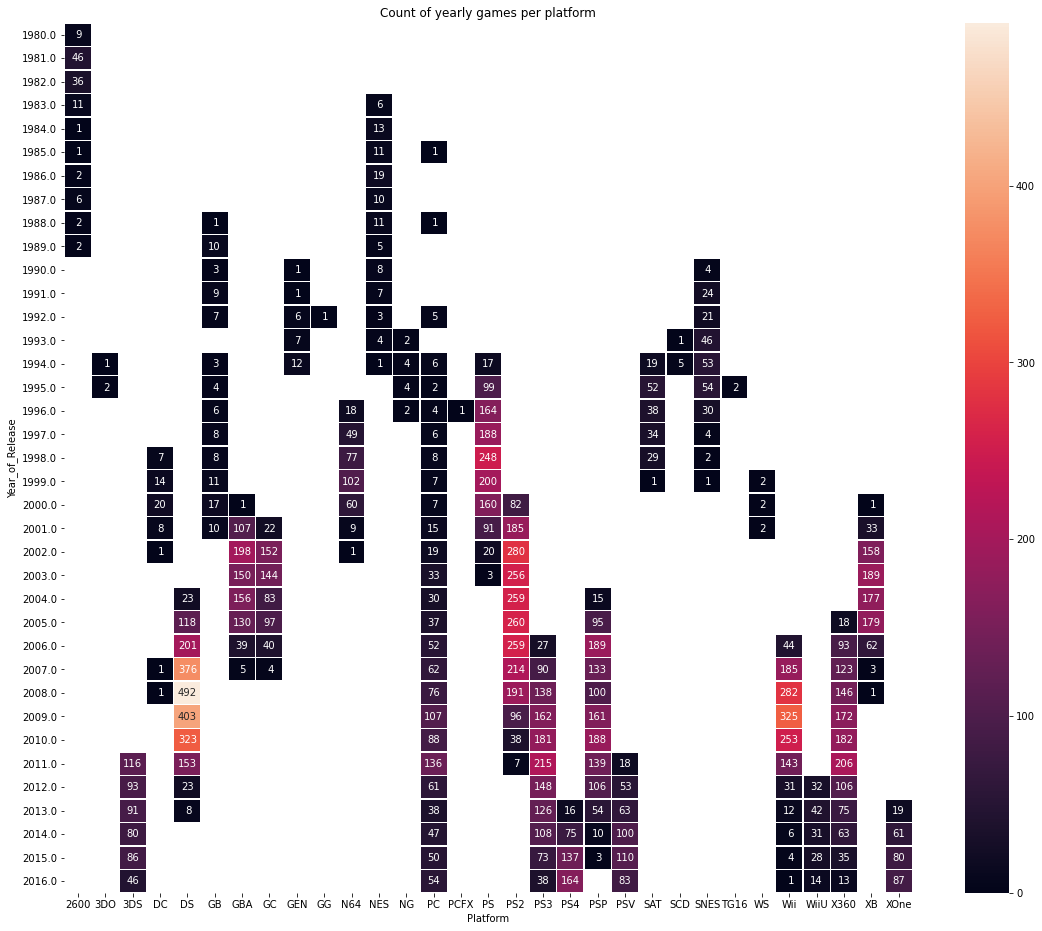

In [39]:
table_platforms = pd.pivot_table(df,values=['Global_Sales'],index=['Year_of_Release'],columns=['Platform'],aggfunc='count',margins=False)

plt.figure(figsize=(19,16))
fig4 = sns.heatmap(table_platforms['Global_Sales'],linewidths=.5,annot=True,fmt='2.0f',vmin=0)
plt.title('Count of yearly games per platform')

In [62]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
server = app.server
app.layout = html.Div([
        html.Div([
            dcc.Graph(id='fig10')
        ]),

        html.Div([
            dcc.Slider(id='the_year',
                min=df['Year_of_Release'].min(),
                max=df['Year_of_Release'].max(),
                value=df['Year_of_Release'].min(),
                marks={str(year): str(year) for year in df['Year_of_Release'].unique()},
                step=None)
        ],style={"width": "90%", "position":"absolute",
                 "left":"5%"})
])

@app.callback(
    Output('fig10','figure'),
    [Input('the_year','value')]
)

def update_graph(year_chosen):

    dff=df[(df['Year_of_Release']==year_chosen)]

    pieplot = px.pie(
        values = dff['Genre'].value_counts(),
        names = dff['Genre'].value_counts().keys(),
        title = "Number of Games per Genre in " + str(year_chosen),
        height=550
    )

    return (pieplot)

app.run_server(debug="True", mode="inline")